In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup as Soup

In [3]:
map_kml = "national_monuments.kml" # imported kml file from Google Maps
with open('national_monuments.kml') as data:
    kml_soup = Soup(data, 'lxml-xml') # Parse as XML
coords = kml_soup.find_all('coordinates') # find all the coordinates
coords_list = []
for x in coords:
    coords_list.append(str(x)) # store the coordinates in a list

In [4]:
names = kml_soup.find_all('name') # find all the coordinates
names_list = []
for x in names:
    names_list.append(str(x)) # store the coordinates in a list

In [17]:
# create new dataframe
coord_col = ['Longitude', 'Latitude', 'Landmark']
df_coord = pd.DataFrame(columns=coord_col) 
# split coordinates list into coordinates to populate the dataframe
for i, j in zip(range(len(coords_list)), range(2, len(names_list))):
    item = coords_list[i]
    sp1 = item.replace('<coordinates>','').replace('</coordinates>','')
    string_split = sp1.split(',')
#     print(string_split)
    coord1 = float(string_split[0])
    coord2 = float(string_split[1])
    coord3 = names_list[j][6:-7]
    df_coord.loc[i] = [coord1, coord2, coord3]

In [18]:
df_coord.head()

,Longitude,Latitude,Landmark
0,-134.3500,57.6400,Admiralty Island
1,-74.0042,40.7144,African Burial Ground
2,-103.7280,42.4160,Agate Fossil Beds
3,-112.0800,34.1500,Agua Fria
4,-173.1600,52.8700,Aleutian Islands World War II


In [ ]:
file = 'national_parks.json'
df = pd.read_json(file, orient='columns')
to_drop = ['Address','City','Fax Number','Location','Location Number','Phone Number','Zip Code']
coord = df.drop(to_drop, axis=1)

In [ ]:
df_coord.head()

In [ ]:
# df_coord = coord[(coord['State']=='UT')|(coord['State']=='Utah')]

In [ ]:
# df_coord.head()

In [ ]:
# df_coord.groupby(['State']).nunique()
df_coord[(df_coord['State']=='UT')|(df_coord['State']=='Utah')]

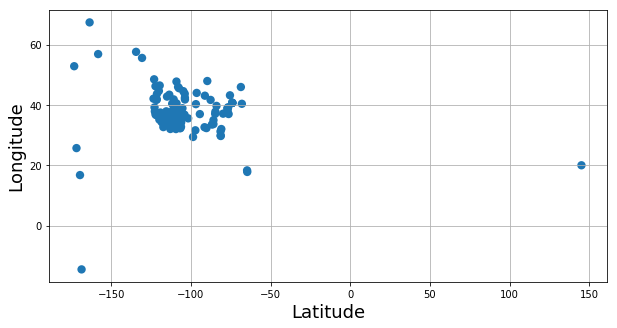

In [54]:
fig = plt.figure(figsize=(10,5))
cmap=plt.cm.rainbow
norm = matplotlib.colors.BoundaryNorm(np.arange(0,10,1), cmap.N)
plt.scatter(df_coord['Longitude'], df_coord['Latitude'],
            cmap=cmap, norm=norm, s=70, edgecolor='none')
plt.xlabel('Latitude', fontsize=18)
plt.ylabel('Longitude', fontsize=18)
plt.grid()
plt.show()

In [21]:
# k-means Clustering of Geo Locations

In [85]:
from sklearn.cluster import KMeans # Importing KMeans
# Creating an instance of KMeans to find 10 clusters
kmeans_1 = KMeans(n_clusters=15)
# Using fit_predict to cluster the dataset
X = df_coord[['Longitude','Latitude']].values
predictions = kmeans_1.fit_predict(X)

In [86]:
clustered = pd.concat([df_coord.reset_index(), 
                       pd.DataFrame({'Cluster':predictions})], 
                      axis=1)

In [87]:
clustered.drop('index', axis=1, inplace=True)

In [88]:
conditions = [
    clustered['Cluster'] == 0, 
    clustered['Cluster'] == 1,
    clustered['Cluster'] == 2,
    clustered['Cluster'] == 3,
    clustered['Cluster'] == 4,
    clustered['Cluster'] == 5,
    clustered['Cluster'] == 6,
    clustered['Cluster'] == 7,
    clustered['Cluster'] == 8,
    clustered['Cluster'] == 9,
    clustered['Cluster'] == 10,
    clustered['Cluster'] == 11,
    clustered['Cluster'] == 12,
    clustered['Cluster'] == 13,
    clustered['Cluster'] == 14]
choices = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']
clustered['Vacation Day'] = np.select(conditions, choices, default='black')

In [89]:
clustered.sort_values(by=['Cluster'])

,Longitude,Latitude,Landmark,Cluster,Vacation Day
38,-104.720000,44.590000,Devils Tower,0,1
52,-110.770000,41.860000,Fossil Butte,0,1
122,-109.020000,47.780000,Upper Missouri River Breaks,0,1
97,-108.001000,45.990000,Pompeys Pillar,0,1
117,-111.710000,40.440000,Timpanogos Cave,0,1
75,-107.430000,45.570000,Little Bighorn Battlefield,0,1
63,-114.950000,42.790000,Hagerman Fossil Beds,0,1
112,-103.700000,41.830000,Scotts Bluff,0,1
69,-103.830000,43.730000,Jewel Cave,0,1
39,-108.980000,40.530000,Dinosaur,0,1


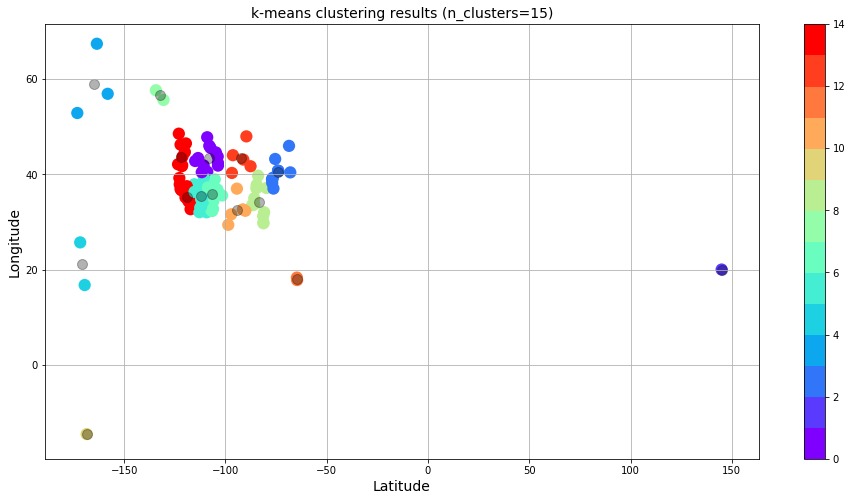

In [95]:
fig = plt.figure(figsize=(16,8))
cmap=plt.cm.rainbow
norm = matplotlib.colors.BoundaryNorm(np.arange(0,15,1), cmap.N)
plt.scatter(clustered['Longitude'], clustered['Latitude'], c=clustered['Cluster'],
            cmap=cmap, norm=norm, s=150, edgecolor='none')
plt.colorbar()
centers = kmeans_1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.3);

plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('k-means clustering results (n_clusters=15)', fontsize=14)
plt.grid()
plt.show()

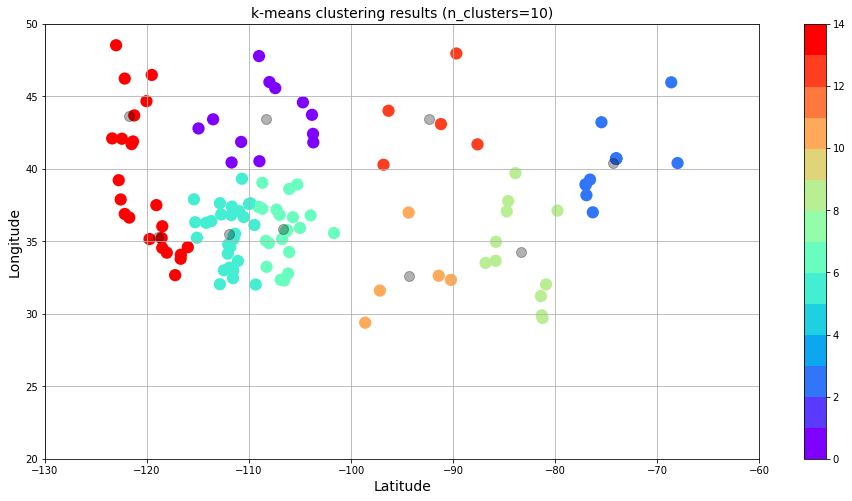

In [101]:
fig = plt.figure(figsize=(16,8))
cmap=plt.cm.rainbow
norm = matplotlib.colors.BoundaryNorm(np.arange(0,15,1), cmap.N)
plt.scatter(clustered['Longitude'], clustered['Latitude'], c=clustered['Cluster'],
            cmap=cmap, norm=norm, s=150, edgecolor='none')
plt.colorbar()
centers = kmeans_1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.3);
plt.xlim(-130, -60)
plt.ylim(20, 50)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('k-means clustering results (n_clusters=10)', fontsize=14)
plt.grid()
plt.show()

In [29]:
#HDBSCAN Clustering of Geo Locations

In [30]:
#!python3 -m pip install hdbscan

In [31]:
import hdbscan

In [32]:
rads = np.radians(X)
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, metric='haversine')
predictions = clusterer.fit_predict(rads)

In [45]:
clustered = pd.concat([df_coord.reset_index(), 
                       pd.DataFrame({'Cluster':predictions})], 
                      axis=1)
clustered.drop('index', axis=1, inplace=True)
conditions = [
    clustered['Cluster'] == -1, 
    clustered['Cluster'] == 0, 
    clustered['Cluster'] == 1,
    clustered['Cluster'] == 2,
    clustered['Cluster'] == 3]
choices = ['One', 'Two', 'Three', 'Four', 'Five']
clustered['Vacation Day'] = np.select(conditions, choices, default='black')
clustered.sort_values(by=['Cluster'])

,Longitude,Latitude,Landmark,Cluster,Vacation Day
34,-109.350,32.02000,Chiricahua,-1,One
24,-119.750,35.16000,Carrizo Plain,-1,One
104,-168.540,-14.55000,Rose Atoll Marine,-1,One
103,-105.700,36.66667,Rio Grande del Norte,-1,One
114,-74.040,40.69000,Statue of Liberty,-1,One
15,-106.059,38.61500,Browns Canyon,-1,One
43,-105.270,38.92000,Florissant Fossil beds,-1,One
23,-103.960,36.79000,Capulin Volcano,-1,One
117,-111.710,40.44000,Timpanogos Cave,-1,One
51,-105.009,35.92500,Fort Union,-1,One


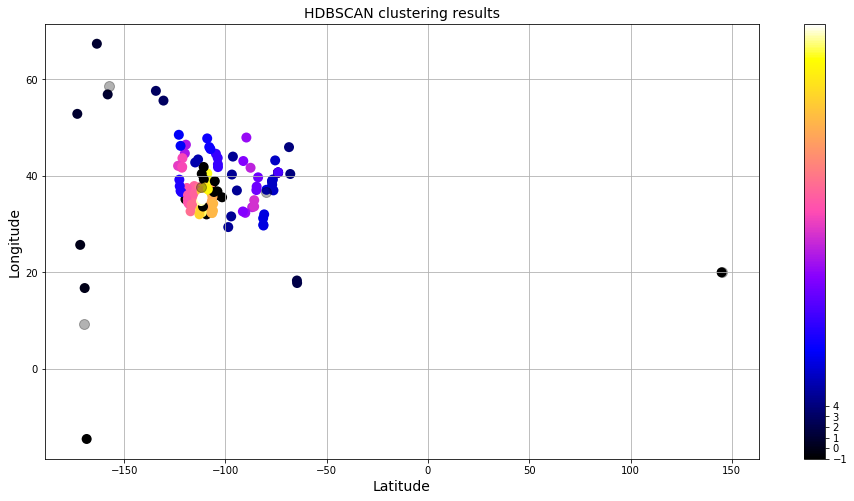

In [47]:
fig = plt.figure(figsize=(16,8))
cmap=plt.cm.gnuplot2
# norm = matplotlib.colors.BoundaryNorm(np.arange(0,10,1), cmap.N)
plt.scatter(clustered['Longitude'], clustered['Latitude'], c=clustered['Cluster'],
            cmap=cmap, s=100, edgecolor='none')
plt.colorbar(ticks=[-1,0,1,2,3,4])
centers = kmeans_1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.3);
#plt.xlim(2.28, 2.375)
#plt.ylim(48.84, 48.89)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('HDBSCAN clustering results', fontsize=14)
plt.grid()
plt.show()

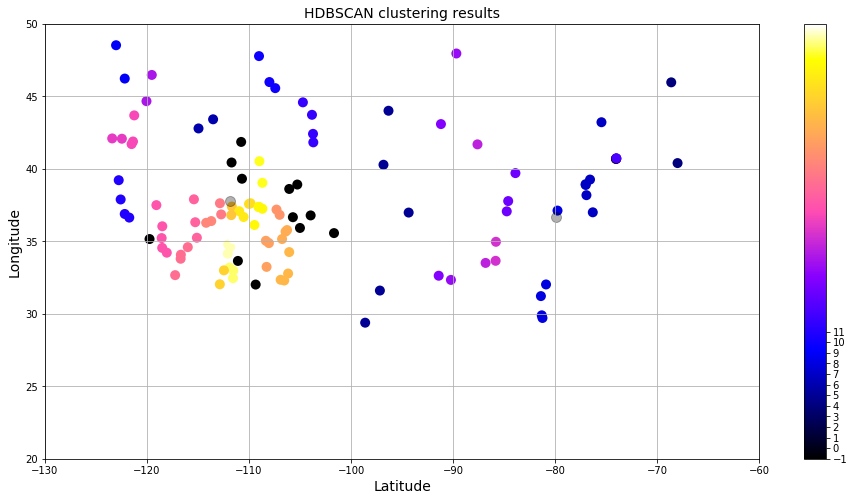

In [44]:

fig = plt.figure(figsize=(16,8))
cmap=plt.cm.gnuplot2
#norm = matplotlib.colors.BoundaryNorm(np.arange(0,10,1), cmap.N)
plt.scatter(clustered['Longitude'], clustered['Latitude'], c=clustered['Cluster'],
            cmap=cmap, s=100, edgecolor='none')
plt.colorbar(ticks=[-1,0,1,2,3,4,5,6,7,8,9,10,11])
centers = kmeans_1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.3);
plt.xlim(-130, -60)
plt.ylim(20, 50)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('HDBSCAN clustering results', fontsize=14)
plt.grid()
plt.show()